In this notebook, I inject signals identical to those injected in Analytic_MCMC_Injected_signals.ipynb but this time I only allow the foregrounds to be described by two terms instead of 5. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os,sys
import corner
sys.path.append(os.path.abspath('../src/'))
import global_signal_black_holes_mcmc as GSBH_MCMC
import global_signal_black_holes as GSBH
#import matplotlib
#matplotlib.rcParams['mathtext.fontset'] = 'stix'
#matplotlib.rcParams['font.family'] = 'STIXGeneral'
#matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

First I initialize a sampler, plot the data, and perform sampling.

{'NU0': 86.07980747261017, 'TAU': 0.1960457114309787, 'A': 0.6237291125612007, 'W': 22.332638477251688, 'NPOLY': 2, 'APOLY0': 1816.0744289924658, 'APOLY1': -21.249465837682514}


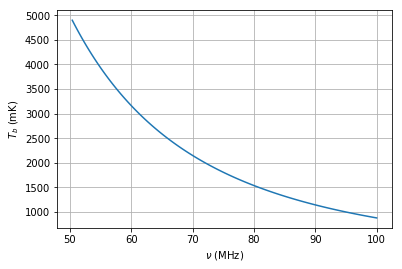

In [2]:
CONFIG='../config/analytic_test_blackhole_injection_simplefg.yaml'
sampler=GSBH_MCMC.Sampler(CONFIG,fmin=50.,fmax=100)#initialize sampler
plt.plot(sampler.freqs,sampler.tb_meas)#plot simulated data 
plt.xlabel('$\\nu$ (MHz)')
plt.ylabel('$T_b$ (mK)')
plt.grid()
sampler.sample()#perform sampling
samples=sampler.sampler.chain[:, sampler.config['NBURN']:, :].reshape((-1, len(sampler.params_vary)))
ml_samples=np.median(samples,axis=0)

In [3]:
print(ml_samples)

[ 8.60742258e+01  2.19467232e-01  6.22397186e-01  2.23391318e+01
  1.81607684e+03 -2.12528590e+01]


Make a corner plot. 

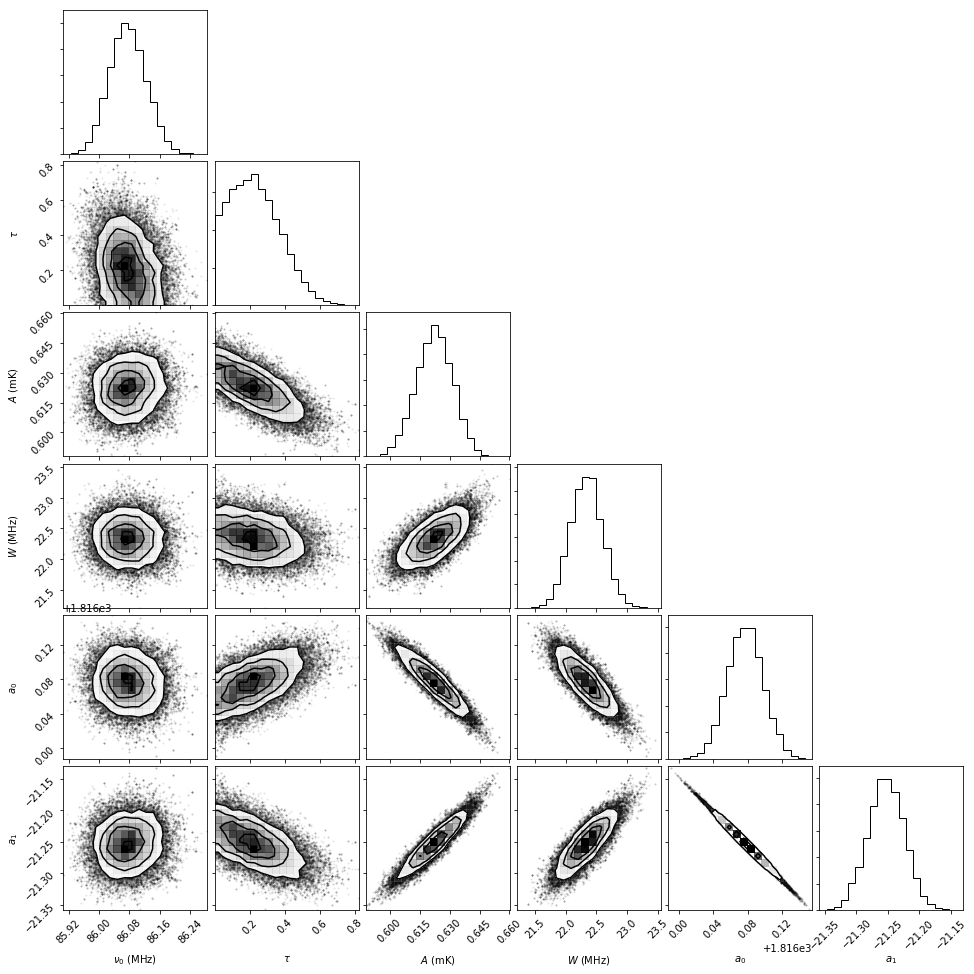

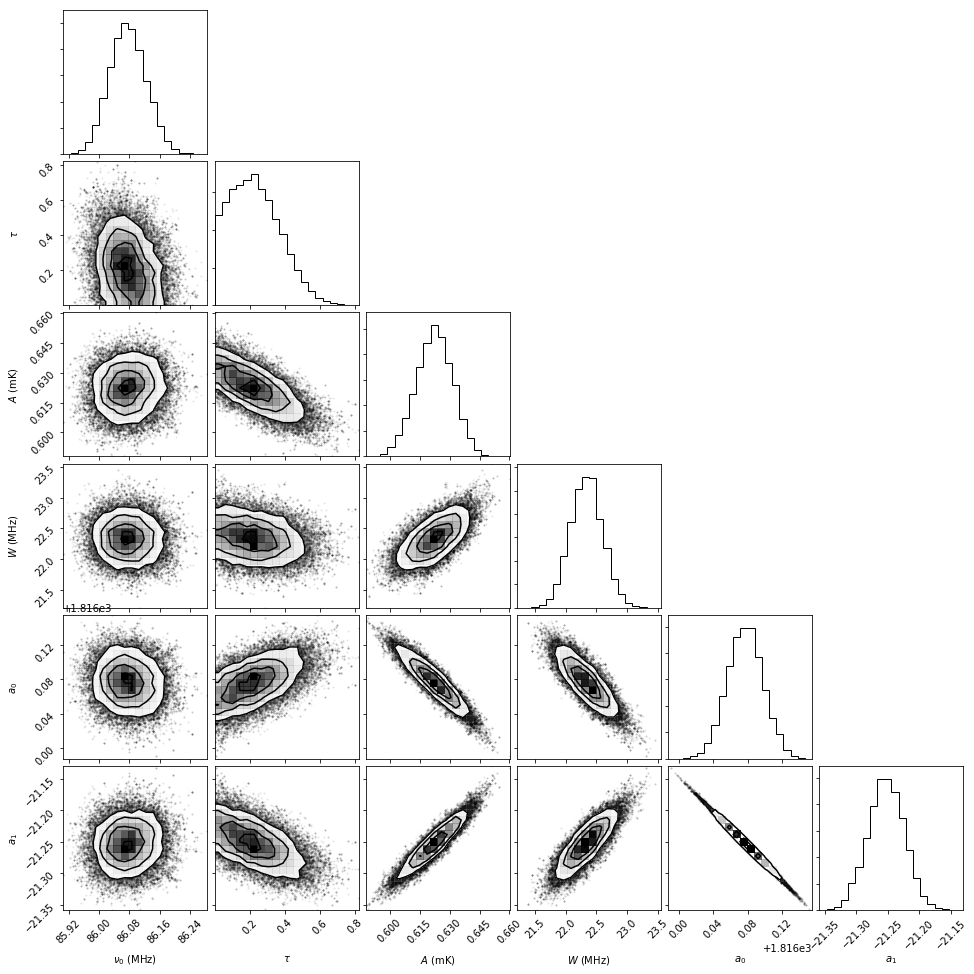

In [4]:
corner.corner(samples,
labels=('$\\nu_0$ (MHz)','$\\tau$','$A$ (mK)','$W$ (MHz)','$a_0$','$a_1$'))

Now we plot the fitted model and our injected model. With the fewer degrees of freedom, the signal is properly recovered. 

In [5]:
print(sampler.params_all)

{'NU0': 86.07980747261017, 'TAU': 0.1960457114309787, 'A': 0.6237291125612007, 'W': 22.332638477251688, 'NPOLY': 2, 'APOLY0': 1816.0744289924658, 'APOLY1': -21.249465837682514}


In [6]:
sampler.params_all['NPOLY']

2

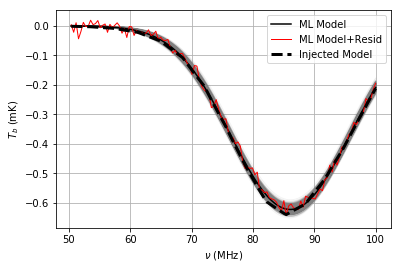

In [7]:
ndraws=1000
for drawnum in range(ndraws):
    draw=np.random.randint(0,len(samples)-1)
    params={'NU0':samples[draw,0],'TAU':samples[draw,1],'A':samples[draw,2],'W':samples[draw,3]}
    plt.plot(sampler.freqs,GSBH_MCMC.delta_Tb_analytic(sampler.freqs,**params),color='grey',lw=1,alpha=.1)
fgdict={}
for n in range(sampler.params_all['NPOLY']):
    key='APOLY%d'%n
    fgdict[key]=ml_samples[n+4] 
fgdict['NPOLY']=sampler.params_all['NPOLY']
l1=plt.plot(sampler.freqs,GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
            sampler.params_all,sampler.params_vary,sampler.analytic)\
        -GSBH_MCMC.Tbfg(sampler.freqs,fgdict),color='k')[0]
l2=plt.plot(sampler.freqs,GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
            sampler.params_all,sampler.params_vary,sampler.analytic)\
        -GSBH_MCMC.Tbfg(sampler.freqs,fgdict)+sampler.dtb,color='r',lw=1)[0]
#l3=plt.plot(sampler.freqs,sampler.tb_meas-GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
#sampler.params_all,[],sampler.analytic),color='blue',lw=1)[0]
#l3=plt.plot(sampler.freqs,sampler.resid,color='blue',lw=1)[0]
l4=plt.plot(sampler.freqs,sampler.data[:,-2],color='k',ls='--',lw=3)[0]
#plt.ylim(-.6,.1)
plt.xlabel('$\\nu$ (MHz)')
plt.ylabel('$T_b$ (mK)')
plt.legend((l1,l2,l4),('ML Model','ML Model+Resid','Injected Model'))
plt.grid()

The smaller stellar signal is not recovered unfortunately. 

{'NU0': 81.12842585480148, 'TAU': 0.992999707972962, 'A': 0.1626315395871114, 'W': 19.665384921741637, 'NPOLY': 2, 'APOLY0': 1816.0835574499993, 'APOLY1': -21.26120469433184}


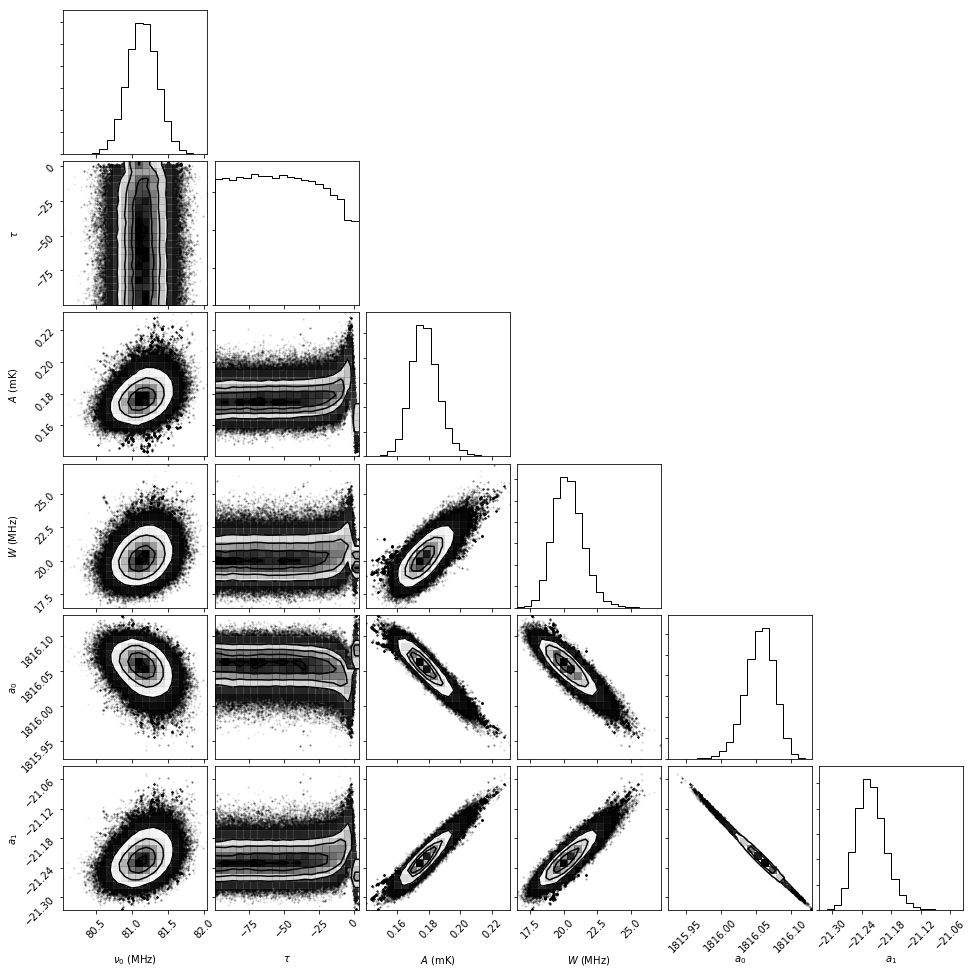

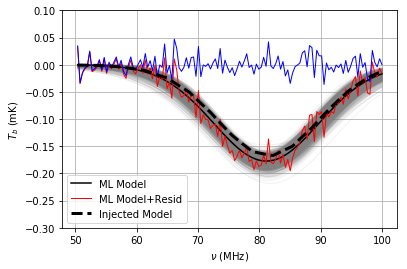

In [26]:
CONFIG='../config/analytic_test_stellar_injection_simplefg.yaml'
sampler=GSBH_MCMC.Sampler(CONFIG,fmin=50.,fmax=100.)
sampler.sample()
samples=sampler.sampler.chain[:, sampler.config['NBURN']:, :].reshape((-1, len(sampler.params_vary)))
ml_samples=np.median(samples,axis=0)
corner.corner(samples,
labels=('$\\nu_0$ (MHz)','$\\tau$','$A$ (mK)','$W$ (MHz)','$a_0$','$a_1$'))
plt.show()
ndraws=1000
for drawnum in range(ndraws):
    draw=np.random.randint(0,len(samples)-1)
    params={'NU0':samples[draw,0],'TAU':samples[draw,1],'A':samples[draw,2],'W':samples[draw,3]}
    plt.plot(sampler.freqs,GSBH_MCMC.delta_Tb_analytic(sampler.freqs,**params),color='grey',lw=1,alpha=.1)
fgdict={}
for n in range(sampler.params_all['NPOLY']):
    key='APOLY%d'%n
    fgdict[key]=ml_samples[n+4] 
fgdict['NPOLY']=sampler.params_all['NPOLY']
l1=plt.plot(sampler.freqs,GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
            sampler.params_all,sampler.params_vary,sampler.analytic)\
        -GSBH_MCMC.Tbfg(sampler.freqs,fgdict),color='k')[0]
l2=plt.plot(sampler.freqs,GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
            sampler.params_all,sampler.params_vary,sampler.analytic)\
        -GSBH_MCMC.Tbfg(sampler.freqs,fgdict)+sampler.dtb,color='r',lw=1)[0]
#l3=plt.plot(sampler.freqs,sampler.tb_meas-GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
#sampler.params_all,[],sampler.analytic),color='blue',lw=1)[0]
#l3=plt.plot(sampler.freqs,sampler.resid,color='blue',lw=1)[0]
l3=plt.plot(sampler.freqs,sampler.tb_meas-GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
sampler.params_all,[],sampler.analytic),color='blue',lw=1)[0]
l4=plt.plot(sampler.freqs,sampler.data[:,-2],color='k',ls='--',lw=3)[0]
plt.ylim(-.3,.1)
plt.xlabel('$\\nu$ (MHz)')
plt.ylabel('$T_b$ (mK)')
plt.legend((l1,l2,l4),('ML Model','ML Model+Resid','Injected Model'))
plt.grid()

We see that it is impossible to recover the smaller amplitude signal even with a single foreground term. 

{'NU0': 81.18874657149401, 'TAU': -0.2735995779621648, 'A': 0.16790940867565532, 'W': 19.167436235266823, 'NPOLY': 1, 'APOLY0': 1816.075996610567}


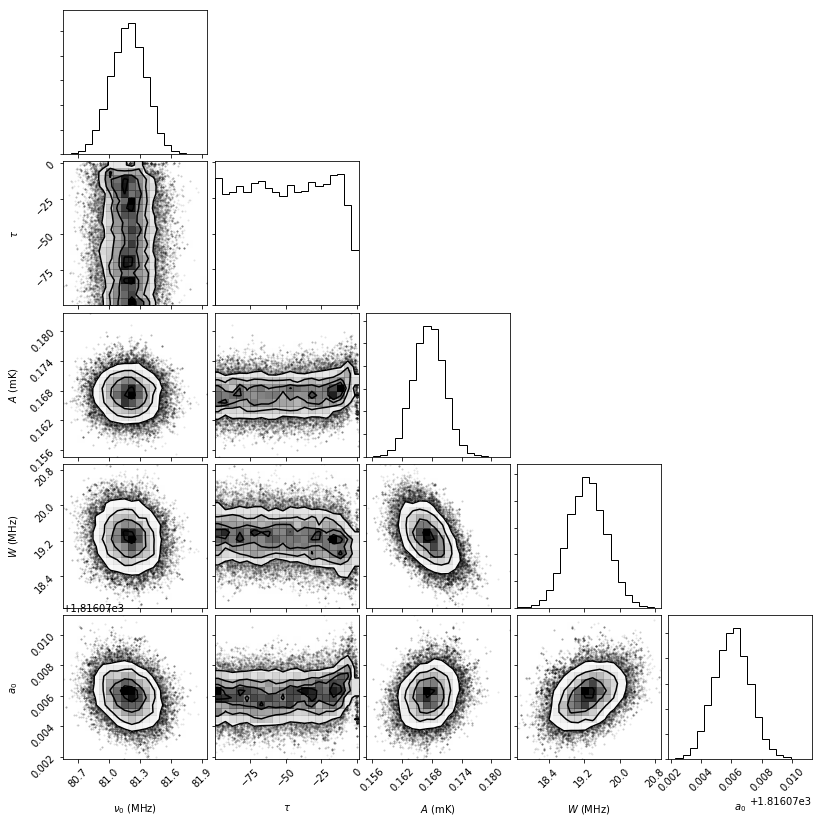

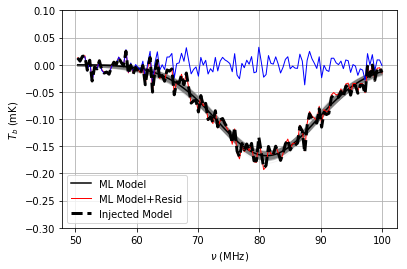

In [25]:
CONFIG='../config/analytic_test_stellar_injection_supersimplefg.yaml'
sampler=GSBH_MCMC.Sampler(CONFIG,fmin=50.,fmax=100.)
sampler.sample()
samples=sampler.sampler.chain[:, sampler.config['NBURN']:, :].reshape((-1, len(sampler.params_vary)))
ml_samples=np.median(samples,axis=0)
corner.corner(samples,
labels=('$\\nu_0$ (MHz)','$\\tau$','$A$ (mK)','$W$ (MHz)','$a_0$'))
plt.show()
ndraws=1000
for drawnum in range(ndraws):
    draw=np.random.randint(0,len(samples)-1)
    params={'NU0':samples[draw,0],'TAU':samples[draw,1],'A':samples[draw,2],'W':samples[draw,3]}
    plt.plot(sampler.freqs,GSBH_MCMC.delta_Tb_analytic(sampler.freqs,**params),color='grey',lw=1,alpha=.1)
fgdict={}
for n in range(sampler.params_all['NPOLY']):
    key='APOLY%d'%n
    fgdict[key]=ml_samples[n+4] 
fgdict['NPOLY']=sampler.params_all['NPOLY']
l1=plt.plot(sampler.freqs,GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
            sampler.params_all,sampler.params_vary,sampler.analytic)\
        -GSBH_MCMC.Tbfg(sampler.freqs,fgdict),color='k')[0]
l2=plt.plot(sampler.freqs,GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
            sampler.params_all,sampler.params_vary,sampler.analytic)\
        -GSBH_MCMC.Tbfg(sampler.freqs,fgdict)+sampler.dtb,color='r',lw=1)[0]
l3=plt.plot(sampler.freqs,sampler.tb_meas-GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
sampler.params_all,[],sampler.analytic),color='blue',lw=1)[0]
#l3=plt.plot(sampler.freqs,sampler.resid,color='blue',lw=1)[0]
#l4=plt.plot(sampler.freqs,sampler.data[:,-2],color='k',ls='--',lw=3)[0]
l4=plt.plot(sampler.freqs,sampler.data[:,1]-sampler.data[:,-1],color='k',ls='--',lw=3)[0]

plt.ylim(-.3,.1)
plt.xlabel('$\\nu$ (MHz)')
plt.ylabel('$T_b$ (mK)')
plt.legend((l1,l2,l4),('ML Model','ML Model+Resid','Injected Model'))
plt.grid()